In [1]:
import pandas as pd
import geopandas as gp 


KR1: Collect and process election results in 6 local jurisdictions. [AR, LF]

KR2: Collect and publish candidate data in 6 local jurisdictions. [AR, LF]

KR3: Collect, process, and publish 4 municipal boundaries. [AR] --- don't think LA needs to have 

KR4: Collect, process, join, and publish precinct boundaries with data in KR1. [AR, LF]


# LA SOS 

## [LA Parish Government Structure](https://www.lpgov.org/page/ParishGovStructure)
- parishes governed in most cases by police juries
- parishes correspond to counties
- police juries correspond to county boards or commissioners or similar local governing bodies

ER: https://voterportal.sos.la.gov/static/2022-11-08

Notes on local er: https://docs.google.com/document/d/1ypZxjj-StEgYkKsRU_Lr6k2iWL4cff2Xi1glJx3fU34/edit

Q/A on local er: https://docs.google.com/document/d/1L2jAAwtTNougGnty3Kv-1QCpLhXA2xoIbbJ2m-ECqK4/edit


-----

Note the above is for the elections we are not looking for - additional offices

We are interested in "Metropolitan Council"
- legislative branch of City of Baton Rouge and Parish of East Baton Rouge
- 12 members elected from single-member districts
    - redistricting for these districts - last done 2022
    - ""Unless a different period of time is specified by the constitution or by statute, the governing authority of each local governing body shall reapportion its voting districts by the end of the year following the year in which the population of this state is reported to the president of the United States for each decennial census.""
- elected for 4 year terms 
- Next election in 2024
- sworn in Jan 2 following the election


So, find election results from 2020 and precinct boundaries
- do we already have PB from LA 2020? I believe so

In [2]:
#All results in list in sheet so easiest to manually find row breaks
#Note need to remove "Total Votes" and establish how to allocate "Early Voting"
#Mayor-President -- Metro Council, City of Baton Rouge
mayor_pres = pd.read_excel("./Election+Results+(12-05-2020).xlsx", sheet_name="East Baton Rouge", header=6, index_col=0, nrows=332).rename_axis("prec").reset_index()

council_1 = pd.read_excel("./Election+Results+(12-05-2020).xlsx", sheet_name="East Baton Rouge", header=341, index_col=0, nrows=30).rename_axis("prec").reset_index()
council_4 = pd.read_excel("./Election+Results+(12-05-2020).xlsx", sheet_name="East Baton Rouge", header=374, index_col=0, nrows=31).rename_axis("prec").reset_index()
council_6 = pd.read_excel("./Election+Results+(12-05-2020).xlsx", sheet_name="East Baton Rouge", header=409, index_col=0, nrows=25).rename_axis("prec").reset_index()
council_7 = pd.read_excel("./Election+Results+(12-05-2020).xlsx", sheet_name="East Baton Rouge", header=438, index_col=0, nrows=32).rename_axis("prec").reset_index()
council_10 = pd.read_excel("./Election+Results+(12-05-2020).xlsx", sheet_name="East Baton Rouge", header=473, index_col=0, nrows=31).rename_axis("prec").reset_index()
council_12 = pd.read_excel("./Election+Results+(12-05-2020).xlsx", sheet_name="East Baton Rouge", header=507, index_col=0, nrows=31).rename_axis("prec").reset_index()

/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lilyf

In [87]:
set(council_1["prec"])-set(mayor_pres["prec"])

set()

In [89]:
set(council_4["prec"])-set(mayor_pres["prec"])

set()

In [90]:
set(council_6["prec"])-set(mayor_pres["prec"])

set()

In [91]:
set(council_7["prec"])-set(mayor_pres["prec"])

set()

In [92]:
set(council_10["prec"])-set(mayor_pres["prec"])

set()

In [93]:
set(council_12["prec"])-set(mayor_pres["prec"])

set()

Below I have 6/12 district elections selected - what about the other half, did those elections occur at a different time?

From Ballotpedia:
"Baton Rouge, Louisiana, held elections for mayor-president, twelve city council seats, six constables, six justices of the peace, fifteen 19th Judicial District judgeships, district attorney for the 19th Judicial District, two East Baton Rouge Parish Juvenile Court judgeships, and four East Baton Rouge Parish Family Court judgeships."

"This general election was cancelled"
- but why?
- no opposition from other party, so winner of primary took office

so are these 6 constables? no? where are other 6 city council seats? different parish?


- either create dict for candidate names or read in with convention
- read in the rest of the contests
- read in 2020 precincts, check if match with ER?
    - not a match as is, modification needed
    - check if data directly from Census matches or reorganize IDs, confirm which parts match
    - shouldn't be too bad overall in any case...

In [3]:
mayor_pres["prec"].nunique()

331

In [4]:
council_1["prec"].nunique()

29

In [9]:
mayor_pres["prec"].unique()

array(['Total Votes', '01 001', '01 002 A', '01 002 B', '01 003',
       '01 004', '01 005 A', '01 005 B', '01 006', '01 007', '01 008',
       '01 009', '01 010 A', '01 010 B', '01 011', '01 012 A', '01 012 B',
       '01 013', '01 014 A', '01 014 B', '01 015 A', '01 015 B', '01 016',
       '01 017', '01 018', '01 019', '01 020 A', '01 020 B', '01 021',
       '01 022', '01 023', '01 024', '01 025', '01 026', '01 027',
       '01 028', '01 029', '01 030', '01 031 A', '01 031 B', '01 032 A',
       '01 032 B', '01 033', '01 034 A', '01 034 B', '01 035', '01 036',
       '01 037 A', '01 037 B', '01 038 A', '01 038 B', '01 039', '01 040',
       '01 041 A', '01 041 B', '01 042 A', '01 042 B', '01 043', '01 044',
       '01 045', '01 046 A', '01 046 B', '01 047 A', '01 047 B',
       '01 048 A', '01 048 B', '01 049 A', '01 049 B', '01 050', '01 051',
       '01 052 A', '01 052 B', '01 053 A', '01 053 B', '01 054 A',
       '01 054 B', '01 055 A', '01 055 B', '01 056 A', '01 056 B',
     

In [43]:
mayor_pres["prec"].str.split(" ")

0         [Total, Votes]
1              [01, 001]
2           [01, 002, A]
3           [01, 002, B]
4              [01, 003]
             ...        
326         [03, 070, A]
327         [03, 070, B]
328            [03, 071]
329            [03, 072]
330    [Early, Voting, ]
Name: prec, Length: 331, dtype: object

In [53]:
mayor_pres["prec"].str.split(" ").str[0].nunique()

5

In [52]:
mayor_pres["prec"].str.split(" ").str[1].nunique()

107

In [65]:
mayor_pres["prec"].str.split(" ").str[2].fillna("")

0       
1       
2      A
3      B
4       
      ..
326    A
327    B
328     
329     
330     
Name: prec, Length: 331, dtype: object

In [96]:
mayor_pres["prec"].str.split(" ").str[2].fillna("").unique()

array(['', 'A', 'B'], dtype=object)

In [66]:
mayor_pres["prec"].str.split(" ").str[0]+" "+mayor_pres["prec"].str.split(" ").str[1]+mayor_pres["prec"].str.split(" ").str[2].fillna("")

0       Total Votes
1            01 001
2           01 002A
3           01 002B
4            01 003
           ...     
326         03 070A
327         03 070B
328          03 071
329          03 072
330    Early Voting
Name: prec, Length: 331, dtype: object

In [78]:
mayor_pres["prec"].str.split(" ").str[1].str.lstrip("0")

0       Votes
1           1
2           2
3           2
4           3
        ...  
326        70
327        70
328        71
329        72
330    Voting
Name: prec, Length: 331, dtype: object

In [82]:
mp1 = mayor_pres["prec"].str.split(" ").str[0]+" "+(mayor_pres["prec"].str.split(" ").str[1].str.lstrip("0")+mayor_pres["prec"].str.split(" ").str[2].fillna("")).str.zfill(3)
vtd1 = shp["NAME"].str.split("-").str[1].str.zfill(2)+ " "+shp["NAME"].str.split("-").str[0].str.zfill(3)

In [98]:
shp["NAME"].str.split("-").str[1].str.zfill(2).unique()

array(['01', '06', '07', '08', '02', '09', '05', '03', '04', '2A', '2B',
       '3A', '3B', '4A', '5A', '5B', '1A', '4B', '10', '11', '12', '13',
       '14', '15', '16', '8A', nan, '2C', '2D', '2F', '5E', '1B', '20',
       '23', '19', '3C', '3D', '8B', '8C', '8D', '8E', '8F', '11A', '12A',
       '12B', '12C', '16A', '17A', '17B', '18B', '18C', '18D', '18E',
       '18F', '21A', '21B', '21C', '21D', '22A', '22B', '22C', '11B',
       '11C', '35', '44', '57', '62', '63', '85', '32', '99', '51', '67',
       '17', '45', '36', '83', '58', '25', '31', '18', '21', '26', '27',
       '88', '84', '87', '48', '29', '61', '22', '77', '24', '28', '30',
       '89', '33', '34', '74', '37', '70', '38', '39', '40', '78', '41',
       '56', '69', '42', '59', '43', '65', '46', '47', '49', '73', '50',
       '52', '53', '54', '55', '60', '64', '66', '68', '71', '72', '75',
       '76', '79', '80', '81', '82', '95', '86', '90', '91', '92', '93',
       '94', '97', '100', '101', '103', '104', '105', '

In [114]:
shp[(shp["NAME"].str.contains("-02"))]

,STATEFP,COUNTYFP,VTDST,NAME,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREOWES,G20PREOOTH,G20USSRCAS,...,G20USSDWEN,G20USSLSIG,G20USSIMEN,G20USSOPRI,G20USSOJOH,G20USSNBIL,G20USSNBOU,G20USSNMON,G20USSNDAR,geometry


In [115]:
shp["NAME"].str.split("-").str[1].unique()

array(['1', '6', '7', '8', '2', '9', '5', '3', '4', '2A', '2B', '3A',
       '3B', '4A', '5A', '5B', '1A', '4B', '10', '11', '12', '13', '14',
       '15', '16', '8A', nan, '2C', '2D', '2F', '5E', '1B', '20', '23',
       '19', '3C', '3D', '8B', '8C', '8D', '8E', '8F', '11A', '12A',
       '12B', '12C', '16A', '17A', '17B', '18B', '18C', '18D', '18E',
       '18F', '21A', '21B', '21C', '21D', '22A', '22B', '22C', '11B',
       '11C', '35', '44', '57', '62', '63', '85', '32', '99', '51', '67',
       '17', '45', '36', '83', '58', '25', '31', '18', '21', '26', '27',
       '88', '84', '87', '48', '29', '61', '22', '77', '24', '28', '30',
       '89', '33', '34', '74', '37', '70', '38', '39', '40', '78', '41',
       '56', '69', '42', '59', '43', '65', '46', '47', '49', '73', '50',
       '52', '53', '54', '55', '60', '64', '66', '68', '71', '72', '75',
       '76', '79', '80', '81', '82', '95', '86', '90', '91', '92', '93',
       '94', '97', '100', '101', '103', '104', '105', '107', '10

In [100]:
mayor_pres["prec"].str.split(" ").str[0].unique()

array(['Total', '01', '02', '03', 'Early'], dtype=object)

In [116]:
mayor_pres

,prec,Sharon Weston Broome (DEM),Steve Carter (REP)
0,Total Votes,65495,50353
1,01 001,195,80
2,01 002 A,110,1
3,01 002 B,105,2
4,01 003,133,9
...,...,...,...
326,03 070 A,64,300
327,03 070 B,51,272
328,03 071,46,227
329,03 072,155,103


In [117]:
mayor_pres["prec"].str.split(" ").str[1].unique()

array(['Votes', '001', '002', '003', '004', '005', '006', '007', '008',
       '009', '010', '011', '012', '013', '014', '015', '016', '017',
       '018', '019', '020', '021', '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031', '032', '033', '034', '035',
       '036', '037', '038', '039', '040', '041', '042', '043', '044',
       '045', '046', '047', '048', '049', '050', '051', '052', '053',
       '054', '055', '056', '057', '058', '059', '060', '061', '062',
       '063', '064', '065', '066', '067', '068', '069', '070', '071',
       '072', '073', '074', '075', '076', '077', '078', '079', '080',
       '081', '082', '083', '084', '085', '086', '087', '088', '089',
       '090', '091', '092', '093', '094', '095', '097', '098', '099',
       '100', '101', '102', '103', '104', '105', '107', 'Voting'],
      dtype=object)

- Are these precincts different from the statewide precincts?

<AxesSubplot:>

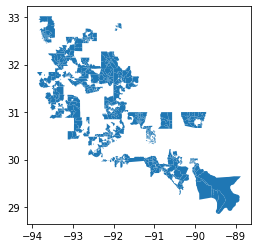

In [112]:
shp[(shp["NAME"].str.contains("-1"))|(shp["NAME"].str.contains("-2"))|(shp["NAME"].str.contains("-3"))].plot()

<AxesSubplot:>

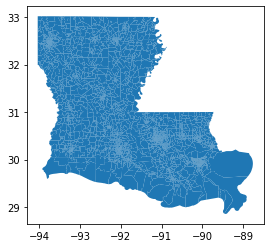

In [99]:
shp.plot()

In [94]:
mp1.unique()

array(['Total Votes', '01 001', '01 02A', '01 02B', '01 003', '01 004',
       '01 05A', '01 05B', '01 006', '01 007', '01 008', '01 009',
       '01 10A', '01 10B', '01 011', '01 12A', '01 12B', '01 013',
       '01 14A', '01 14B', '01 15A', '01 15B', '01 016', '01 017',
       '01 018', '01 019', '01 20A', '01 20B', '01 021', '01 022',
       '01 023', '01 024', '01 025', '01 026', '01 027', '01 028',
       '01 029', '01 030', '01 31A', '01 31B', '01 32A', '01 32B',
       '01 033', '01 34A', '01 34B', '01 035', '01 036', '01 37A',
       '01 37B', '01 38A', '01 38B', '01 039', '01 040', '01 41A',
       '01 41B', '01 42A', '01 42B', '01 043', '01 044', '01 045',
       '01 46A', '01 46B', '01 47A', '01 47B', '01 48A', '01 48B',
       '01 49A', '01 49B', '01 050', '01 051', '01 52A', '01 52B',
       '01 53A', '01 53B', '01 54A', '01 54B', '01 55A', '01 55B',
       '01 56A', '01 56B', '01 057', '01 58A', '01 58B', '01 059',
       '01 60A', '01 60B', '01 061', '01 062', '01 63A', 

In [95]:
vtd1.unique()

array(['01 001', '06 001', '07 001', '08 001', '01 002', '07 003',
       '02 004', '09 001', '02 002', '01 003', '02 003', '05 003',
       '03 002', '04 002', '04 003', '06 003', '01 004', '05 002',
       '04 004', '05 004', '02 006', '08 006', '03 007', '04 007',
       '2A 001', '2B 001', '3A 001', '3B 001', '4A 001', '5A 001',
       '5B 001', '3A 003', '3B 003', '1A 005', '06 004', '04 006',
       '06 006', '02 007', '4B 001', '03 005', '04 005', '05 005',
       '01 006', '07 006', '09 006', '2A 005', '10 006', '11 006',
       '12 006', '13 006', '14 006', '15 006', '16 006', '3A 006',
       '3B 006', '02 001', '03 001', '04 001', '05 001', '06 002',
       '03 004', '02 005', '10 005', '13 005', '8A 005', '12 005',
       '09 005', '07 005', nan, '01 005', '01 007', '01 008', '03 006',
       '01 009', '03 008', '03 003', '07 002', '08 002', '03 009',
       '04 009', '02 010', '04 010', '01 011', '2A 002', '2B 002',
       '2C 002', '2D 002', '2F 002', '3A 002', '4A 002', 

In [83]:
len(set(mp1)-set(vtd1))

300

In [85]:
set(mp1)-set(vtd1)

{'01 018',
 '01 019',
 '01 022',
 '01 023',
 '01 024',
 '01 025',
 '01 028',
 '01 029',
 '01 02A',
 '01 02B',
 '01 030',
 '01 033',
 '01 035',
 '01 036',
 '01 040',
 '01 043',
 '01 044',
 '01 045',
 '01 050',
 '01 051',
 '01 057',
 '01 059',
 '01 05A',
 '01 05B',
 '01 061',
 '01 062',
 '01 064',
 '01 065',
 '01 067',
 '01 068',
 '01 076',
 '01 079',
 '01 084',
 '01 088',
 '01 089',
 '01 093',
 '01 094',
 '01 097',
 '01 100A',
 '01 100B',
 '01 101A',
 '01 101B',
 '01 102',
 '01 103A',
 '01 103B',
 '01 104A',
 '01 104B',
 '01 105',
 '01 107',
 '01 10A',
 '01 10B',
 '01 12A',
 '01 12B',
 '01 14A',
 '01 14B',
 '01 15A',
 '01 15B',
 '01 20A',
 '01 31A',
 '01 31B',
 '01 32A',
 '01 32B',
 '01 34A',
 '01 34B',
 '01 37A',
 '01 37B',
 '01 38A',
 '01 38B',
 '01 41A',
 '01 41B',
 '01 42A',
 '01 42B',
 '01 46A',
 '01 47A',
 '01 47B',
 '01 48A',
 '01 48B',
 '01 49A',
 '01 52A',
 '01 52B',
 '01 53A',
 '01 53B',
 '01 54A',
 '01 54B',
 '01 55A',
 '01 55B',
 '01 56A',
 '01 56B',
 '01 58A',
 '01 58B',
 '

In [71]:
mp1.nunique()

331

In [6]:
shp = gp.read_file("./la_vest_20/la_vest_20.shp")

In [7]:
shp["VTDST"][shp["VTDST"].str.contains("B")]

25      001-2B
27      001-3B
30      001-5B
32      003-3B
38      001-4B
         ...  
3724    003-1B
3740    049B-2
3741    049B-1
3742    00002B
3745    00011B
Name: VTDST, Length: 143, dtype: object

In [10]:
print(shp["VTDST"].nunique())
print(shp["NAME"].nunique())

1548
1548


In [12]:
shp["NAME"].unique()

array(['1-1', '1-6', '1-7', ..., '3-32', '1-98', '3-72'], dtype=object)

In [14]:
shp["NAME"].str.split("-")

0        [1, 1]
1        [1, 6]
2        [1, 7]
3        [1, 8]
4        [2, 1]
         ...   
3748    [3, 16]
3749    [3, 71]
3750    [3, 32]
3751    [1, 98]
3752    [3, 72]
Name: NAME, Length: 3753, dtype: object

In [32]:
shp

,STATEFP,COUNTYFP,VTDST,NAME,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREOWES,G20PREOOTH,G20USSRCAS,...,G20USSDWEN,G20USSLSIG,G20USSIMEN,G20USSOPRI,G20USSOJOH,G20USSNBIL,G20USSNBOU,G20USSNMON,G20USSNDAR,geometry
0,22,001,0001-1,1-1,1050,81,7,3,4,992,...,0,0,3,2,4,10,18,3,3,"POLYGON Z ((-92.26591 30.27931 0.00000, -92.26..."
1,22,001,0001-6,1-6,31,382,6,3,4,34,...,0,0,4,2,0,19,8,4,5,"POLYGON Z ((-92.29665 30.24829 0.00000, -92.29..."
2,22,001,0001-7,1-7,77,307,3,2,6,79,...,4,3,2,3,0,6,11,3,4,"POLYGON Z ((-92.28446 30.23592 0.00000, -92.28..."
3,22,001,0001-8,1-8,535,146,5,2,2,493,...,6,7,0,3,7,3,6,0,5,"POLYGON Z ((-92.27125 30.27131 0.00000, -92.27..."
4,22,001,0002-1,2-1,990,62,7,1,2,932,...,0,7,3,2,3,8,4,1,1,"POLYGON Z ((-92.24707 30.31642 0.00000, -92.24..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,22,033,003-16,3-16,610,141,3,0,9,641,...,0,3,0,0,0,0,0,0,0,"POLYGON Z ((-90.99050 30.39896 0.00000, -90.99..."
3749,22,033,003-71,3-71,463,98,13,4,3,516,...,2,1,1,3,0,0,0,0,0,"POLYGON Z ((-90.98361 30.40277 0.00000, -90.98..."
3750,22,033,003-32,3-32,355,441,6,0,3,359,...,12,5,0,3,1,3,8,4,0,"POLYGON Z ((-91.02459 30.45165 0.00000, -91.02..."
3751,22,033,001-98,1-98,920,831,15,9,14,940,...,12,14,12,0,2,6,12,6,1,"POLYGON Z ((-91.04094 30.43395 0.00000, -91.04..."


In [27]:
prec_test = shp["NAME"].str.split("-").str[0].str.zfill(2)+" "+shp["NAME"].str.split("-").str[1].str.zfill(3)

In [54]:
shp["NAME"].str.split("-").str[1].nunique()

244

In [55]:
shp["NAME"].str.split("-").str[0].nunique()

739

In [59]:
shp["NAME"].str.split("-").str[1]

0        1
1        6
2        7
3        8
4        1
        ..
3748    16
3749    71
3750    32
3751    98
3752    72
Name: NAME, Length: 3753, dtype: object

In [57]:
shp["NAME"].str.split("-").str[0]

0       1
1       1
2       1
3       1
4       2
       ..
3748    3
3749    3
3750    3
3751    1
3752    3
Name: NAME, Length: 3753, dtype: object

In [31]:
prec_test.unique()

array(['01 001', '01 006', '01 007', '01 008', '02 001', '03 007',
       '04 002', '01 009', '02 002', '03 001', '03 002', '03 005',
       '02 003', '02 004', '03 004', '03 006', '04 001', '02 005',
       '04 004', '04 005', '06 002', '06 008', '07 003', '07 004',
       '01 02A', '01 02B', '01 03A', '01 03B', '01 04A', '01 05A',
       '01 05B', '03 03A', '03 03B', '05 01A', '04 006', '06 004',
       '06 006', '07 002', '01 04B', '05 003', '05 004', '05 005',
       '06 001', '06 007', '06 009', '05 02A', '06 010', '06 011',
       '06 012', '06 013', '06 014', '06 015', '06 016', '06 03A',
       '06 03B', '01 002', '01 003', '01 004', '01 005', '02 006',
       '04 003', '05 002', '05 010', '05 013', '05 08A', '05 012',
       '05 009', '05 007', nan, '05 001', '07 001', '08 001', '06 003',
       '09 001', '08 003', '03 003', '02 007', '02 008', '09 003',
       '09 004', '10 002', '10 004', '11 001', '02 02A', '02 02B',
       '02 02C', '02 02D', '02 02F', '02 03A', '02 04A', 

In [29]:
set(mayor_pres["prec"])

{'01 001',
 '01 002 A',
 '01 002 B',
 '01 003',
 '01 004',
 '01 005 A',
 '01 005 B',
 '01 006',
 '01 007',
 '01 008',
 '01 009',
 '01 010 A',
 '01 010 B',
 '01 011',
 '01 012 A',
 '01 012 B',
 '01 013',
 '01 014 A',
 '01 014 B',
 '01 015 A',
 '01 015 B',
 '01 016',
 '01 017',
 '01 018',
 '01 019',
 '01 020 A',
 '01 020 B',
 '01 021',
 '01 022',
 '01 023',
 '01 024',
 '01 025',
 '01 026',
 '01 027',
 '01 028',
 '01 029',
 '01 030',
 '01 031 A',
 '01 031 B',
 '01 032 A',
 '01 032 B',
 '01 033',
 '01 034 A',
 '01 034 B',
 '01 035',
 '01 036',
 '01 037 A',
 '01 037 B',
 '01 038 A',
 '01 038 B',
 '01 039',
 '01 040',
 '01 041 A',
 '01 041 B',
 '01 042 A',
 '01 042 B',
 '01 043',
 '01 044',
 '01 045',
 '01 046 A',
 '01 046 B',
 '01 047 A',
 '01 047 B',
 '01 048 A',
 '01 048 B',
 '01 049 A',
 '01 049 B',
 '01 050',
 '01 051',
 '01 052 A',
 '01 052 B',
 '01 053 A',
 '01 053 B',
 '01 054 A',
 '01 054 B',
 '01 055 A',
 '01 055 B',
 '01 056 A',
 '01 056 B',
 '01 057',
 '01 058 A',
 '01 058 B',
 '

In [39]:
len(set(mayor_pres["prec"])-set(prec_test))

234

In [38]:
len(set(prec_test)- set(mayor_pres["prec"]))

710

In [40]:
prec_test2 = shp["NAME"].str.split("-").str[1].str.zfill(2)+" "+shp["NAME"].str.split("-").str[0].str.zfill(3)

In [41]:
len(set(mayor_pres["prec"])-set(prec_test2))

303